In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers

In [2]:
(train_data, train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
word_index = imdb.get_word_index()


In [6]:
word_index = dict([(value,key) for (key,value) in word_index.items()])

In [7]:
word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [8]:
for _ in train_data[0]:
  print(word_index.get(_ - 3))

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha


# Ejemplo para entender la vectorizacion

In [9]:
dato=np.array([list([1,2,3,4,5]),         #se crea un arreglo con 3 ejemplos, cada ejemplo tiene 5 números que equivalen a 5 palabras
               list([6,7,8,9,10]),        #cada número corresponde a una palabra diferente
               list([11,12,13,14,0])])    #este ejemplo contiene las palabras 11,12,13,14 y 0


dim=15                              #hacemos de cuenta que solo existen 15 palabras no 10000
results = np.zeros((len(dato),dim))  #se crea un vector de ceros con tres ejemplos, cada ejemplo tiene 15 posiciones


for i, sequences in enumerate(dato):   #se realizan 3 iteraciones, una por cada ejemplo
    results[i,sequences]=1             #el segundo ejemplo de dato tiene las palabras 6,7,8,9 y 10. En results, esas posiciones quedan en uno
print(results)                  #De quince posiciones de cada ejemplo del vector de resultados, se marcan en uno las palabras que existen en cada ejemplo de dato

[[0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]]


In [10]:
def vectorizar(sequences, dim=10000):
  results = np.zeros((len(sequences), dim))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

In [11]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [12]:
x_train.shape

(25000, 10000)

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics = 'accuracy')

In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [24]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 0.5386 - accuracy: 0.7790 - val_loss: 0.4080 - val_accuracy: 0.8645
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3353 - accuracy: 0.8911 - val_loss: 0.3205 - val_accuracy: 0.8829
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2535 - accuracy: 0.9133 - val_loss: 0.3020 - val_accuracy: 0.8815
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2059 - accuracy: 0.9298 - val_loss: 0.2970 - val_accuracy: 0.8799
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1723 - accuracy: 0.9425 - val_loss: 0.2755 - val_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1469 - accuracy: 0.9525 - val_loss: 0.2817 - val_accuracy: 0.8878
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1253 - accuracy: 0.9604 - val_loss: 0.3402 - val_accuracy: 0.8744
Epoch 8/20
30

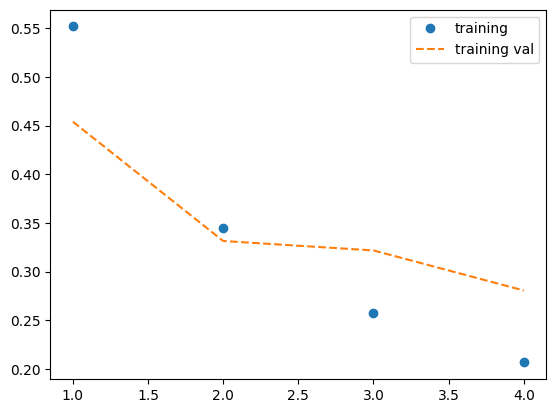

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range(1, len(loss_values)+1)
plt.plot(epoch, loss_values, 'o', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'training val')
plt.legend()
plt.show()

In [19]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.2939 - accuracy: 0.8815


[0.2938508689403534, 0.8815199732780457]

In [20]:
history_dict

{'loss': [0.5518872141838074,
  0.3445933163166046,
  0.25694775581359863,
  0.20653310418128967],
 'accuracy': [0.7615333199501038,
  0.8858000040054321,
  0.9146666526794434,
  0.9305999875068665],
 'val_loss': [0.4539910554885864,
  0.33139175176620483,
  0.32169225811958313,
  0.28051865100860596],
 'val_accuracy': [0.8138999938964844,
  0.8755000233650208,
  0.8687000274658203,
  0.885699987411499]}

### Modelo menos complejo apara reducir el overfiting

In [29]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics = 'accuracy')

history2 = model2.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.6241 - accuracy: 0.7506 - val_loss: 0.5541 - val_accuracy: 0.8446
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4965 - accuracy: 0.8745 - val_loss: 0.4622 - val_accuracy: 0.8689
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4059 - accuracy: 0.8961 - val_loss: 0.3961 - val_accuracy: 0.8784
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3396 - accuracy: 0.9073 - val_loss: 0.3508 - val_accuracy: 0.8826
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2909 - accuracy: 0.9165 - val_loss: 0.3213 - val_accuracy: 0.8846
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2544 - accuracy: 0.9252 - val_loss: 0.3001 - val_accuracy: 0.8902
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2256 - accuracy: 0.9326 - val_loss: 0.2890 - val_accuracy: 0.8892
Epoch 8/20
30

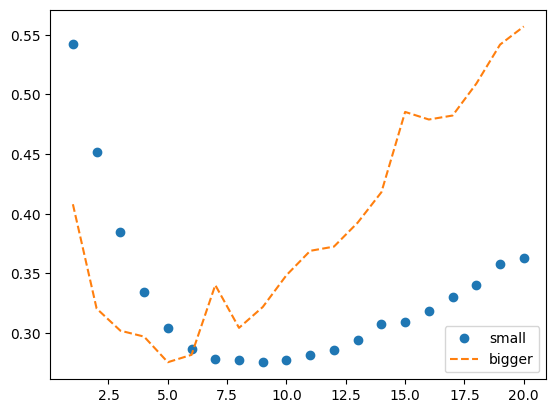

In [28]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values_2 = history2.history['val_loss']

epoch = range(1, len(loss_values)+1)
plt.plot(epoch, val_loss_values_2, 'o', label = 'small')
plt.plot(epoch, val_loss_values, '--', label = 'bigger')
plt.legend()
plt.show()

# Regularizacion

In [30]:
from keras import regularizers

In [31]:
model3 = models.Sequential()
model3.add(layers.Dense(4, activation='relu', input_shape=(10000,),
                        kernel_regularizer= regularizers.l2(0.001)))
model3.add(layers.Dense(4, activation='relu', kernel_regularizer= regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics = 'accuracy')

history3 = model3.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.6407 - accuracy: 0.6487 - val_loss: 0.5988 - val_accuracy: 0.6769
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5544 - accuracy: 0.7846 - val_loss: 0.5437 - val_accuracy: 0.8086
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5021 - accuracy: 0.8473 - val_loss: 0.5076 - val_accuracy: 0.8381
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4630 - accuracy: 0.8797 - val_loss: 0.4839 - val_accuracy: 0.8416
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4315 - accuracy: 0.9014 - val_loss: 0.4591 - val_accuracy: 0.8705
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4031 - accuracy: 0.9183 - val_loss: 0.4402 - val_accuracy: 0.8815
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3783 - accuracy: 0.9258 - val_loss: 0.4250 - val_accuracy: 0.8860
Epoch 8/20
30

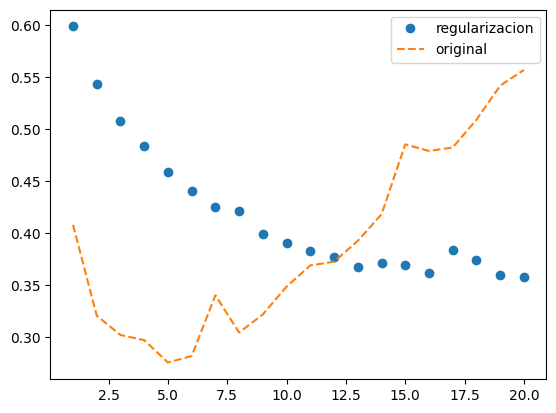

In [32]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values_3 = history3.history['val_loss']

epoch = range(1, len(loss_values)+1)
plt.plot(epoch, val_loss_values_3, 'o', label = 'regularizacion')
plt.plot(epoch, val_loss_values, '--', label = 'original')
plt.legend()
plt.show()

# Dropout

In [33]:
model4 = models.Sequential()
model4.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(4, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics = 'accuracy')

history4 = model4.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 79ms/step - loss: 0.6763 - accuracy: 0.5733 - val_loss: 0.6396 - val_accuracy: 0.7777
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.6339 - accuracy: 0.6621 - val_loss: 0.5873 - val_accuracy: 0.7899
Epoch 3/20
30/30 [==============================] - 1s 46ms/step - loss: 0.6080 - accuracy: 0.7037 - val_loss: 0.5553 - val_accuracy: 0.8426
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.5874 - accuracy: 0.7211 - val_loss: 0.5310 - val_accuracy: 0.8501
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5704 - accuracy: 0.7347 - val_loss: 0.5197 - val_accuracy: 0.8734
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5542 - accuracy: 0.7478 - val_loss: 0.4884 - val_accuracy: 0.8519
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5434 - accuracy: 0.7516 - val_loss: 0.4754 - val_accuracy: 0.8539
Epoch 8/20
30

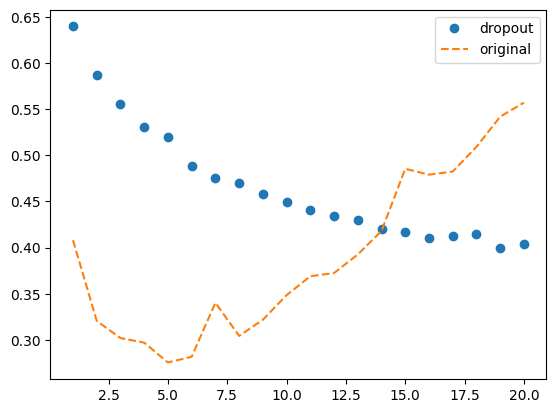

In [34]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values_4 = history4.history['val_loss']

epoch = range(1, len(loss_values)+1)
plt.plot(epoch, val_loss_values_4, 'o', label = 'dropout')
plt.plot(epoch, val_loss_values, '--', label = 'original')
plt.legend()
plt.show()

# Mi modelo

In [38]:
model5 = models.Sequential()
model5.add(layers.Dense(8, activation='relu', input_shape=(10000,),
                        kernel_regularizer= regularizers.l2(0.001)))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(8, activation='relu', kernel_regularizer= regularizers.l2(0.001)))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(1, activation='sigmoid'))

model5.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics = 'accuracy')

history5 = model5.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 65ms/step - loss: 0.6858 - accuracy: 0.5958 - val_loss: 0.6277 - val_accuracy: 0.7743
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6223 - accuracy: 0.6883 - val_loss: 0.5688 - val_accuracy: 0.8585
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5807 - accuracy: 0.7264 - val_loss: 0.5225 - val_accuracy: 0.8656
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5485 - accuracy: 0.7533 - val_loss: 0.4886 - val_accuracy: 0.8774
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5188 - accuracy: 0.7719 - val_loss: 0.4441 - val_accuracy: 0.8846
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.4886 - accuracy: 0.7918 - val_loss: 0.4238 - val_accuracy: 0.8749
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4663 - accuracy: 0.8089 - val_loss: 0.3933 - val_accuracy: 0.8876
Epoch 8/20
30

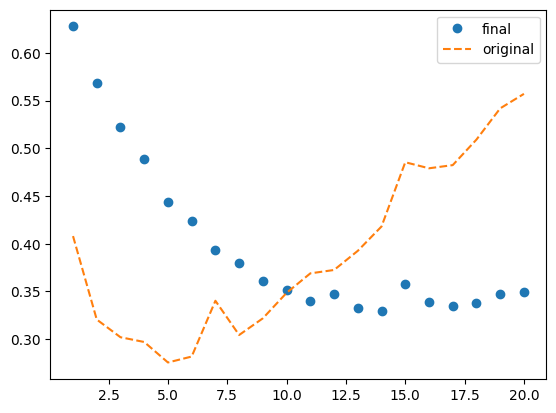

In [39]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values_5 = history5.history['val_loss']

epoch = range(1, len(loss_values)+1)
plt.plot(epoch, val_loss_values_5, 'o', label = 'final')
plt.plot(epoch, val_loss_values, '--', label = 'original')
plt.legend()
plt.show()